In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder

from skfeature.function.similarity_based import fisher_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import kstest
import statsmodels.api as sm

import pickle
import json


import warnings
warnings.filterwarnings("ignore")

# Problem Statement

# Data Gathering

In [4]:
df1 = pd.read_csv("Clean_Dataset.csv")
df1

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [5]:
df = df1[200000:225000]
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
200000,200000,Indigo,6E-5038,Chennai,Morning,one,Evening,Kolkata,Economy,11.08,23,7653
200001,200001,Air_India,AI-440,Chennai,Early_Morning,one,Evening,Kolkata,Economy,11.42,23,7777
200002,200002,Vistara,UK-822,Chennai,Morning,one,Evening,Kolkata,Economy,7.08,23,8394
200003,200003,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Kolkata,Economy,9.83,23,8394
200004,200004,Vistara,UK-824,Chennai,Night,one,Evening,Kolkata,Economy,20.33,23,8394
...,...,...,...,...,...,...,...,...,...,...,...,...
224995,224995,Vistara,UK-875,Mumbai,Evening,one,Evening,Delhi,Business,24.58,1,57308
224996,224996,Air_India,AI-681,Mumbai,Evening,one,Night,Delhi,Business,27.17,1,59964
224997,224997,Air_India,AI-774,Mumbai,Night,one,Morning,Delhi,Business,12.33,1,61261
224998,224998,Air_India,AI-774,Mumbai,Night,one,Afternoon,Delhi,Business,16.00,1,61261


In [6]:
df.shape

(25000, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 200000 to 224999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        25000 non-null  int64  
 1   airline           25000 non-null  object 
 2   flight            25000 non-null  object 
 3   source_city       25000 non-null  object 
 4   departure_time    25000 non-null  object 
 5   stops             25000 non-null  object 
 6   arrival_time      25000 non-null  object 
 7   destination_city  25000 non-null  object 
 8   class             25000 non-null  object 
 9   duration          25000 non-null  float64
 10  days_left         25000 non-null  int64  
 11  price             25000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 2.3+ MB


In [8]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,25000.000000,25000.000000,25000.000000,25000.000000
mean,212499.500000,12.732680,26.793560,37268.090360
std,7217.022701,7.655283,13.645128,22133.371961
min,200000.000000,1.000000,1.000000,1105.000000
25%,206249.750000,6.580000,15.000000,13026.000000
50%,212499.500000,12.000000,28.000000,42457.000000
75%,218749.250000,17.500000,39.000000,53209.000000
max,224999.000000,37.920000,49.000000,117307.000000


In [9]:
df.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [10]:
df.nunique()

Unnamed: 0          25000
airline                 6
flight                232
source_city             3
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              337
days_left              49
price                1155
dtype: int64

# Exploratory Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 200000 to 224999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        25000 non-null  int64  
 1   airline           25000 non-null  object 
 2   flight            25000 non-null  object 
 3   source_city       25000 non-null  object 
 4   departure_time    25000 non-null  object 
 5   stops             25000 non-null  object 
 6   arrival_time      25000 non-null  object 
 7   destination_city  25000 non-null  object 
 8   class             25000 non-null  object 
 9   duration          25000 non-null  float64
 10  days_left         25000 non-null  int64  
 11  price             25000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 2.3+ MB


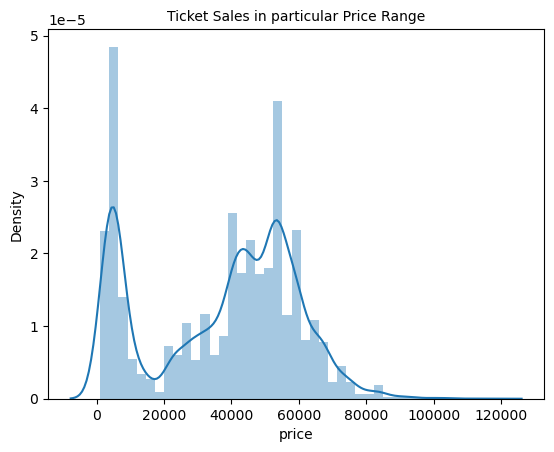

In [17]:
sns.distplot(df['price'])
plt.title("Ticket Sales in particular Price Range", fontsize=10)
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

### How does the ticket price vary between Economy and Business class?

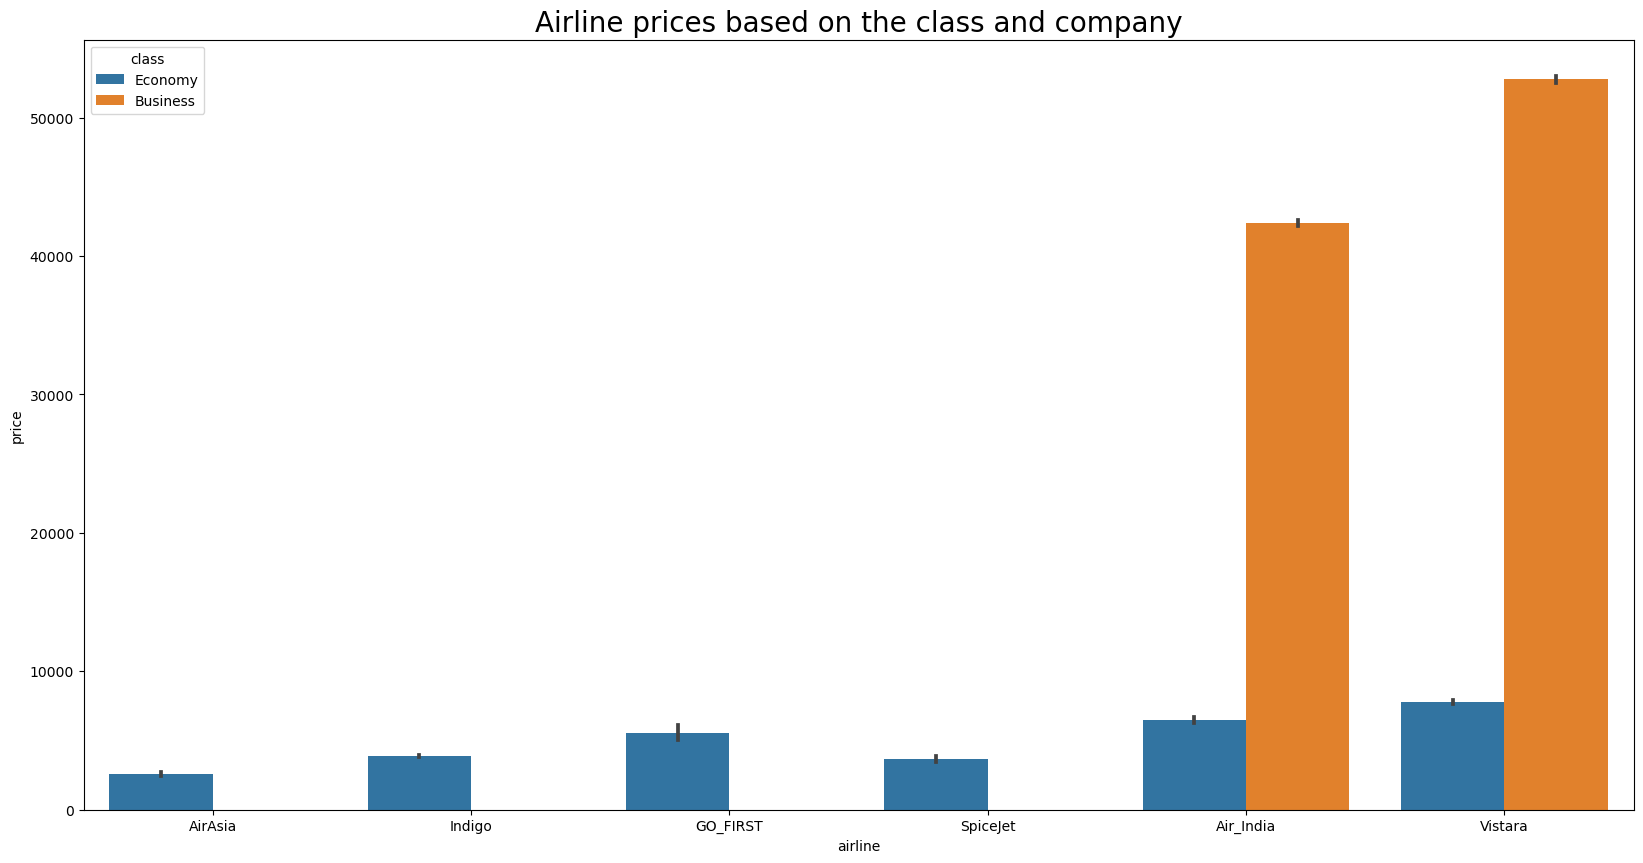

In [18]:
plt.figure(figsize=(20, 10))
sns.barplot(x='airline',y='price',hue="class",data=df.sort_values("price")).set_title('Airline prices based on the class and company',fontsize=20)

plt.savefig('Airline prices based on the class and company.png', dpi=300, bbox_inches='tight')

### How is the price affected when tickets are bought in just 1 or 2 days before departure?

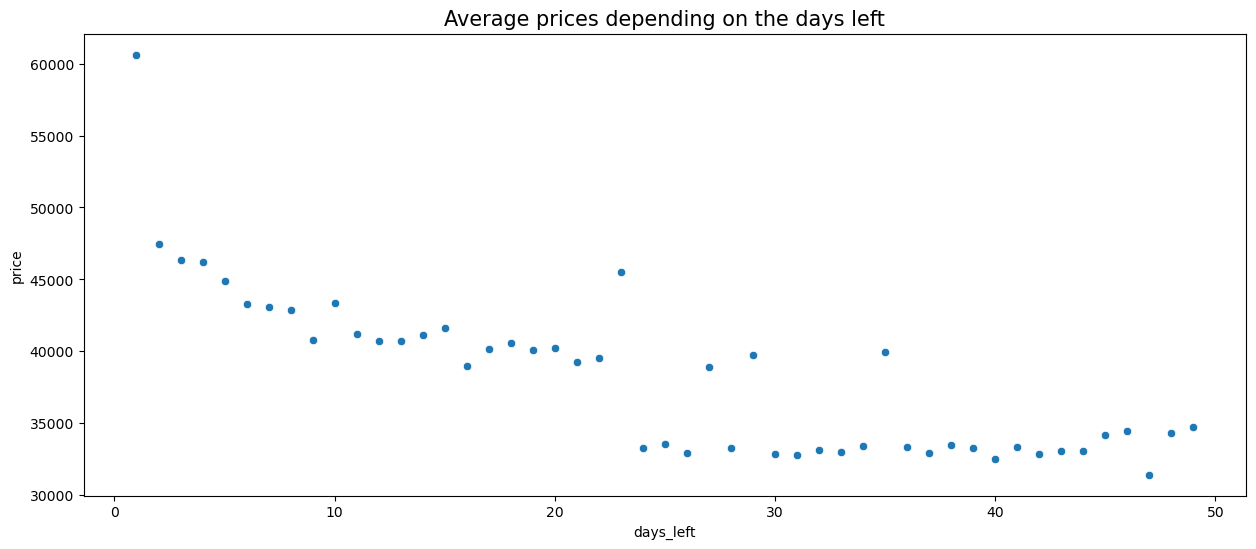

In [19]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="days_left", y="price", data=df_temp).set_title("Average prices depending on the days left",fontsize=15)
plt.savefig('Average prices depending on the days left.png', dpi=300, bbox_inches='tight')

### Does the price change with the duration of the flight?

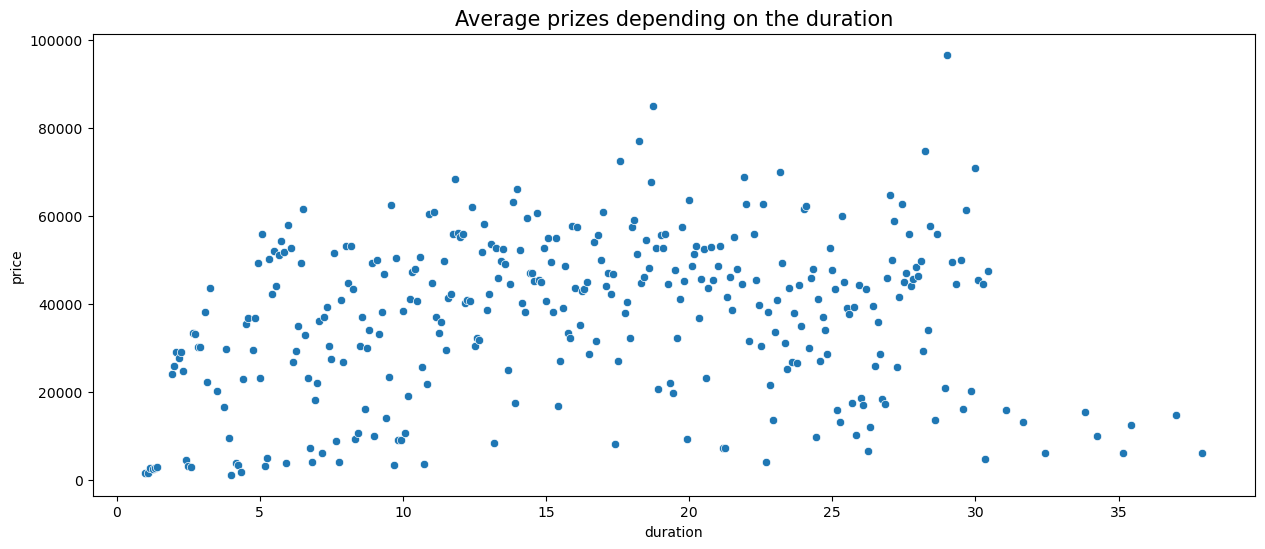

In [13]:
df_temp = df.groupby(['duration'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="duration", y="price", data=df_temp).set_title("Average prizes depending on the duration",fontsize=15)
plt.savefig('Average prizes depending on the duration.png', dpi=300, bbox_inches='tight')

### Does ticket price change based on the departure time and arrival time?

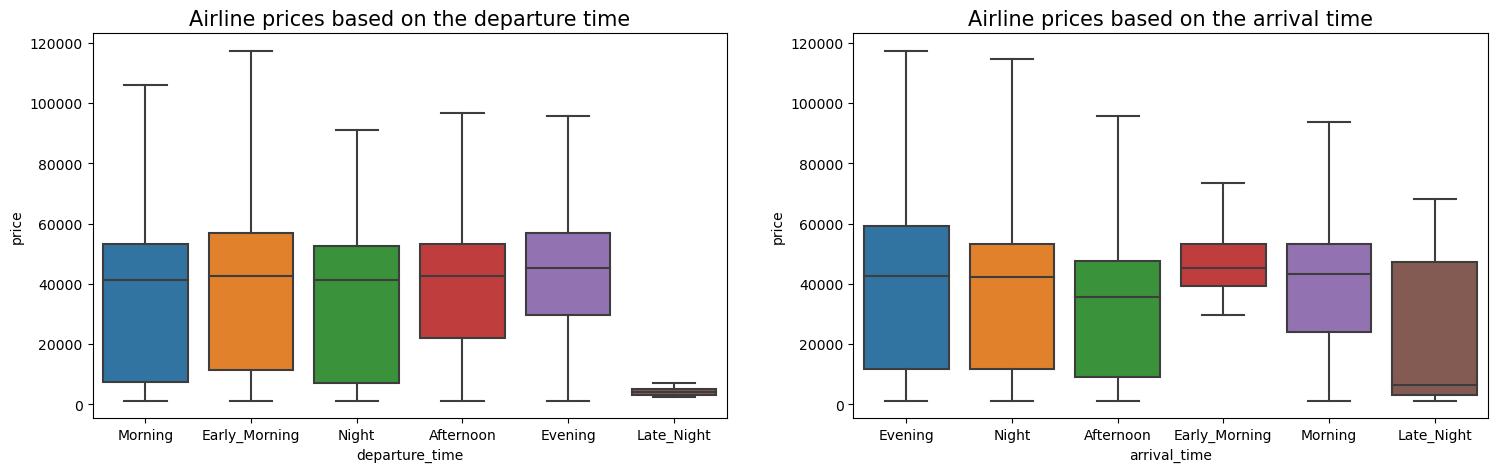

In [20]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="price", x="departure_time",showfliers=False).set_title("Airline prices based on the departure time",fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=df, y="price", x="arrival_time",showfliers=False).set_title("Airline prices based on the arrival time",fontsize=15)
plt.savefig('Airline prices based on the arrival time.png', dpi=300, bbox_inches='tight')

### Does the number of stops influences the price?

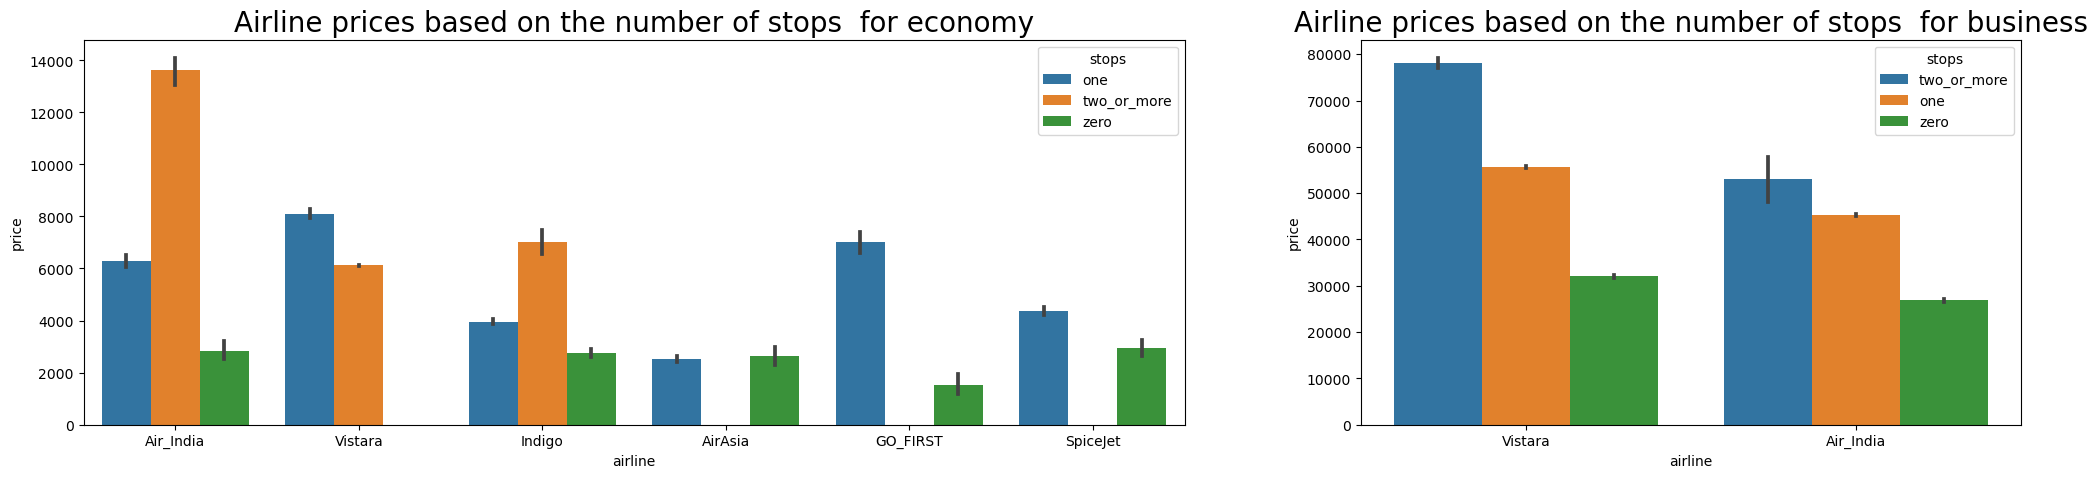

In [21]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False), ax=axs[0])
axs[0].set_title("Airline prices based on the number of stops  for economy",fontsize=20)
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False), ax=axs[1])
axs[1].set_title("Airline prices based on the number of stops  for business",fontsize=20)
plt.savefig('Airline prices based on the number of stops  for business', dpi=300, bbox_inches='tight')

# Encoding the features

In [16]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
200000,200000,Indigo,6E-5038,Chennai,Morning,one,Evening,Kolkata,Economy,11.08,23,7653
200001,200001,Air_India,AI-440,Chennai,Early_Morning,one,Evening,Kolkata,Economy,11.42,23,7777
200002,200002,Vistara,UK-822,Chennai,Morning,one,Evening,Kolkata,Economy,7.08,23,8394
200003,200003,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Kolkata,Economy,9.83,23,8394
200004,200004,Vistara,UK-824,Chennai,Night,one,Evening,Kolkata,Economy,20.33,23,8394


In [17]:
df.drop(["Unnamed: 0","flight"],axis=1,inplace=True)

In [18]:
oe = OrdinalEncoder()
df["airline"] = oe.fit_transform(df[["airline"]])
categories = oe.categories_
airlines_cat = {category: i for i, category in enumerate(categories[0])}

df["source_city"] = oe.fit_transform(df[["source_city"]])
categories = oe.categories_
source_city_cat = {category: i for i, category in enumerate(categories[0])}

df["departure_time"] = oe.fit_transform(df[["departure_time"]])
categories = oe.categories_
departure_time_cat = {category: i for i, category in enumerate(categories[0])}

df["arrival_time"] = oe.fit_transform(df[["arrival_time"]])
categories = oe.categories_
arrival_time_cat = {category: i for i, category in enumerate(categories[0])}

df["destination_city"] = oe.fit_transform(df[["destination_city"]])
categories = oe.categories_
destination_city_cat = {category: i for i, category in enumerate(categories[0])}

df["class"] = oe.fit_transform(df[["class"]])
categories = oe.categories_
class_cat = {category: i for i, category in enumerate(categories[0])}

df["stops"] = oe.fit_transform(df[["stops"]])
categories = oe.categories_
stops_cat = {category: i for i, category in enumerate(categories[0])}

In [19]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
200000,3.0,0.0,4.0,0.0,2.0,4.0,1.0,11.08,23,7653
200001,1.0,0.0,1.0,0.0,2.0,4.0,1.0,11.42,23,7777
200002,5.0,0.0,4.0,0.0,2.0,4.0,1.0,7.08,23,8394
200003,5.0,0.0,1.0,0.0,2.0,4.0,1.0,9.83,23,8394
200004,5.0,0.0,5.0,0.0,2.0,4.0,1.0,20.33,23,8394
...,...,...,...,...,...,...,...,...,...,...
224995,5.0,2.0,2.0,0.0,2.0,2.0,0.0,24.58,1,57308
224996,1.0,2.0,2.0,0.0,5.0,2.0,0.0,27.17,1,59964
224997,1.0,2.0,5.0,0.0,4.0,2.0,0.0,12.33,1,61261
224998,1.0,2.0,5.0,0.0,0.0,2.0,0.0,16.00,1,61261


# Feature Selection

In [20]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
200000,3.0,0.0,4.0,0.0,2.0,4.0,1.0,11.08,23,7653
200001,1.0,0.0,1.0,0.0,2.0,4.0,1.0,11.42,23,7777
200002,5.0,0.0,4.0,0.0,2.0,4.0,1.0,7.08,23,8394
200003,5.0,0.0,1.0,0.0,2.0,4.0,1.0,9.83,23,8394
200004,5.0,0.0,5.0,0.0,2.0,4.0,1.0,20.33,23,8394


In [21]:
df.corr()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,1.000000,0.051613,-0.031049,0.000929,-0.003074,-0.097424,-0.052460,-0.107020,-0.011358,0.229398
source_city,0.051613,1.000000,-0.083899,0.009027,0.009253,-0.157875,-0.998169,0.030397,-0.146840,0.854676
departure_time,-0.031049,-0.083899,1.000000,-0.005905,-0.046260,-0.007427,0.085009,0.061931,0.001493,-0.091327
stops,0.000929,0.009027,-0.005905,1.000000,0.024108,0.013248,-0.008538,-0.537084,-0.006061,-0.242955
arrival_time,-0.003074,0.009253,-0.046260,0.024108,1.000000,-0.030255,-0.009205,-0.108345,-0.015482,0.014757
destination_city,-0.097424,-0.157875,-0.007427,0.013248,-0.030255,1.000000,0.157425,0.024856,0.056201,-0.177863
class,-0.052460,-0.998169,0.085009,-0.008538,-0.009205,0.157425,1.000000,-0.030409,0.144176,-0.856344
duration,-0.107020,0.030397,0.061931,-0.537084,-0.108345,0.024856,-0.030409,1.000000,-0.023818,0.177608
days_left,-0.011358,-0.146840,0.001493,-0.006061,-0.015482,0.056201,0.144176,-0.023818,1.000000,-0.180647
price,0.229398,0.854676,-0.091327,-0.242955,0.014757,-0.177863,-0.856344,0.177608,-0.180647,1.000000


<AxesSubplot:>

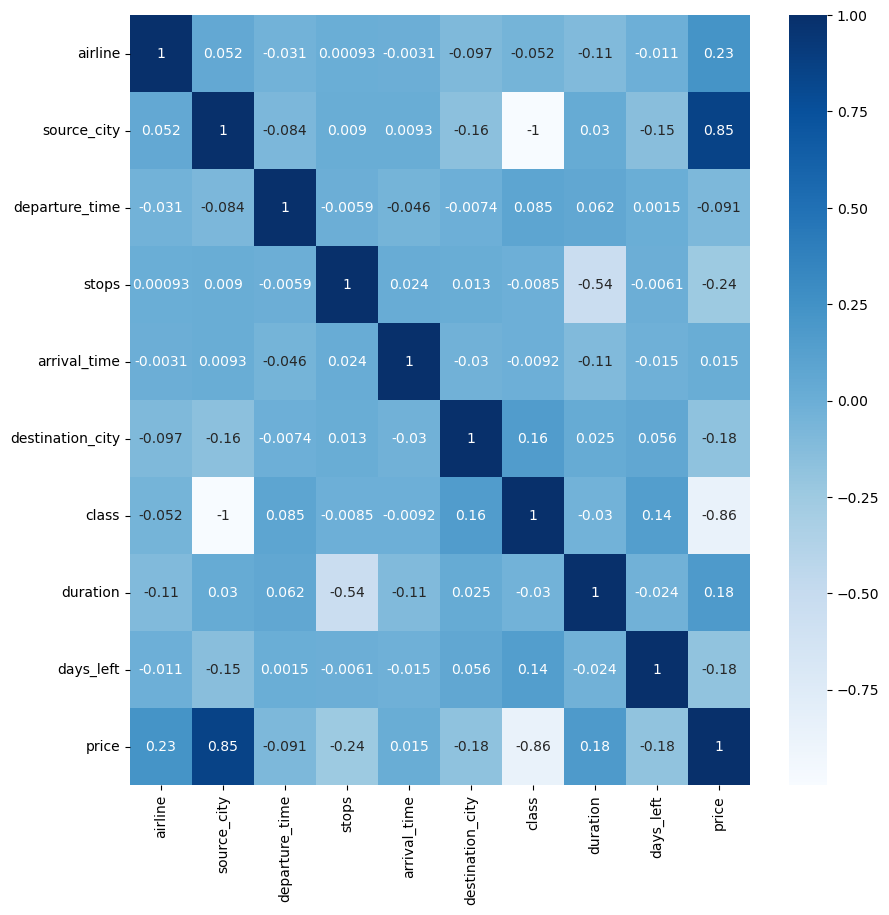

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

<AxesSubplot:>

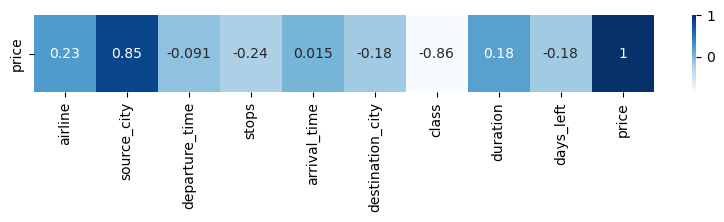

In [23]:
plt.figure(figsize=(10,1))
sns.heatmap(df.corr().tail(1),annot=True,cmap="Blues")

In [103]:
x = df.drop("price",axis=1)
y = df["price"]
x

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
200000,3.0,0.0,4.0,0.0,2.0,4.0,1.0,11.08,23
200001,1.0,0.0,1.0,0.0,2.0,4.0,1.0,11.42,23
200002,5.0,0.0,4.0,0.0,2.0,4.0,1.0,7.08,23
200003,5.0,0.0,1.0,0.0,2.0,4.0,1.0,9.83,23
200004,5.0,0.0,5.0,0.0,2.0,4.0,1.0,20.33,23
...,...,...,...,...,...,...,...,...,...
224995,5.0,2.0,2.0,0.0,2.0,2.0,0.0,24.58,1
224996,1.0,2.0,2.0,0.0,5.0,2.0,0.0,27.17,1
224997,1.0,2.0,5.0,0.0,4.0,2.0,0.0,12.33,1
224998,1.0,2.0,5.0,0.0,0.0,2.0,0.0,16.00,1


In [25]:
df.isna().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

### VIF 

<AxesSubplot:>

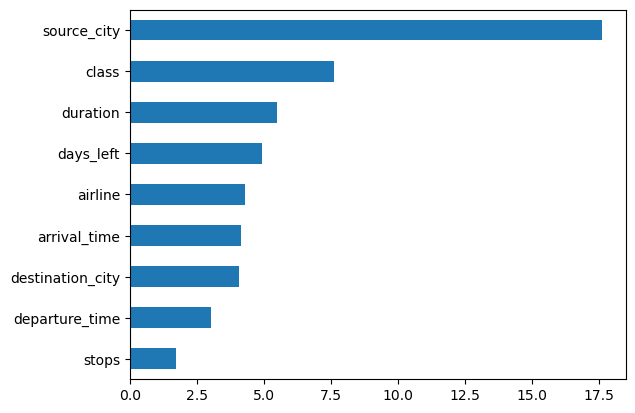

In [26]:
x = df.drop(['price'], axis=1)

vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x, i)
    vif_list.append(vif)
    
s1 = pd.Series(vif_list, index=x.columns)
s1.sort_values().plot(kind="barh")

### Information Gain

<AxesSubplot:>

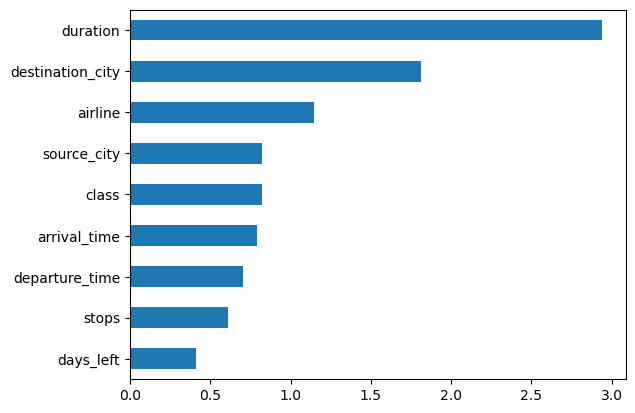

In [27]:
array = mutual_info_classif(x, y)

s2 = pd.Series(array, index=x.columns)
s2.sort_values().plot(kind= 'barh')

### ANOVA Test

In [28]:
f_val, p_val = f_classif(x, y)

df4 = pd.DataFrame({"f_val":f_val, "p_val":np.around(p_val,5)}, index=x.columns)
df4

,f_val,p_val
airline,9.300499e+01,0.0
source_city,6.092869e+04,0.0
departure_time,6.249783e+00,0.0
stops,2.093670e+02,0.0
arrival_time,1.132569e+01,0.0
destination_city,1.974254e+03,0.0
class,inf,0.0
duration,3.017276e+01,0.0
days_left,1.002171e+01,0.0


In [29]:
model_details = []
Testing_accuracy = []
Training_accuracy = []
best_params_list = []

# Model Evalution

In [30]:
def train_test_split_fun(x,y,model_name):
    
    test_size = 0.2
    random_state=101
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)
    
    model_details.append(model_name)
    
    return x_train,x_test,y_train,y_test


model_name = "Linear Regression Regular Model"
x_train, x_test, y_train, y_test = train_test_split_fun(x, y, model_name)

In [31]:
def model_training(x_train, y_train):
    linear_model = LinearRegression()
    linear_model.fit(x_train, y_train)
    return linear_model

linear_model = model_training(x_train,y_train)

In [32]:
def model_evalution_training(linear_model, x_train, y_train):
    
    y_pred_train = linear_model.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square)   
    
    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
    
model_evalution_training(linear_model, x_train, y_train)

Mean squared Error:  80333726.9276656
Root Mean squared Error:  8962.908396701687
Mean Absolute Error:  6603.068928109009
r_squared_value for Training:  0.8363894487643361


In [33]:
def model_evalution_testing(linear_model, x_test, y_test):
    
    y_pred = linear_model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
    
model_evalution_testing(linear_model, x_test, y_test)

Mean squared Error:  79094150.8040191
Root Mean squared Error:  8893.4892367405
Mean Absolute Error:  6571.392628202304
r_squared_value for Testing:  0.8370233328263429


In [104]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=7)

In [35]:
Linear_model = LinearRegression()
Linear_model.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pred = Linear_model.predict(x_test)
y_pred

array([28488.63644951, 38913.67253257, 56061.80654263, ...,
       55430.89973534, 58127.64930516, 43536.49138879])

In [37]:
residual = y_test - y_pred
residual

221752    -4544.636450
207208   -10041.672533
217058    11707.193457
220754     7003.277375
222505    -2649.836694
              ...     
213214      223.510130
212223      809.748378
216279    10098.100265
222212     7704.350695
218244     -160.491389
Name: price, Length: 6250, dtype: float64

In [38]:
# Model evalution on training data

y_pred_train = Linear_model.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("Mean squared Error: ",mse)

rmse = np.sqrt(mse)
print("Root Mean squared Error: ",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("Mean Absolute Error: ",mae)

r_square = r2_score(y_train,y_pred_train)
print("r_squared_value for Training: ",r_square)

Mean squared Error:  79543178.76757143
Root Mean squared Error:  8918.698266427195
Mean Absolute Error:  6564.513973202504
r_squared_value for Training:  0.8387764576521326


In [39]:
# Model Evaluation for Testing Data

mse = mean_squared_error(y_test,y_pred)
print("Mean squared Error: ",mse)

rmse = np.sqrt(mse)
print("Root Mean squared Error: ",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error: ",mae)

r_square = r2_score(y_test,y_pred)
print("r_squared_value for Testing: ",r_square)

Mean squared Error:  81737822.92111687
Root Mean squared Error:  9040.897240933384
Mean Absolute Error:  6638.459606772654
r_squared_value for Testing:  0.8292974534701603


# Normality of Residual

In [40]:
Residual = y_train - y_pred_train
Residual

214726     8659.580004
223358    -8489.073821
205953     1166.505382
217408    55077.281292
217346    -2391.416982
              ...     
200919      208.303120
220691     -211.875570
205699     -406.561445
210742    38911.143255
216921    23704.970483
Name: price, Length: 18750, dtype: float64

### 1. Kde



<AxesSubplot:xlabel='price', ylabel='Density'>

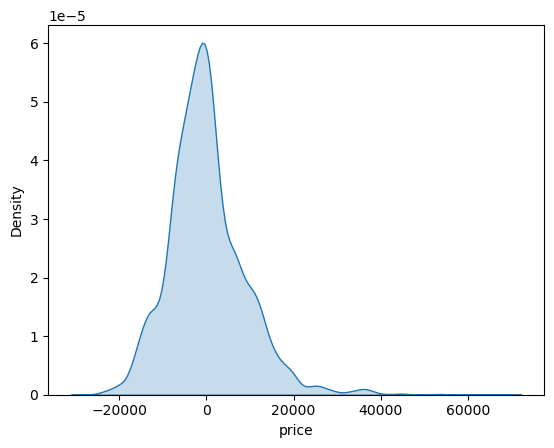

In [41]:
sns.kdeplot(Residual,fill=True)

### 2. Hypothesis Testing

### 2.1 USing Shepiro Test

In [42]:
_,p_val = shapiro(Residual)
p_val


0.0

### 2.2 Normal Test

In [43]:
_, p_val = normaltest(Residual)
p_val

0.0

### 2.3 Ks Test

In [44]:
_,p_val = kstest(Residual,"norm")
p_val

0.0

### 3. QQ Plot

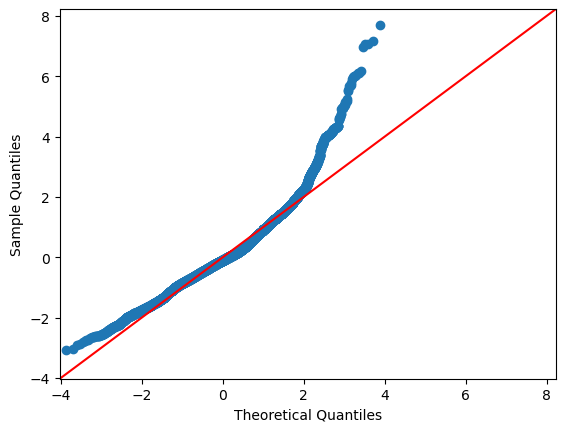

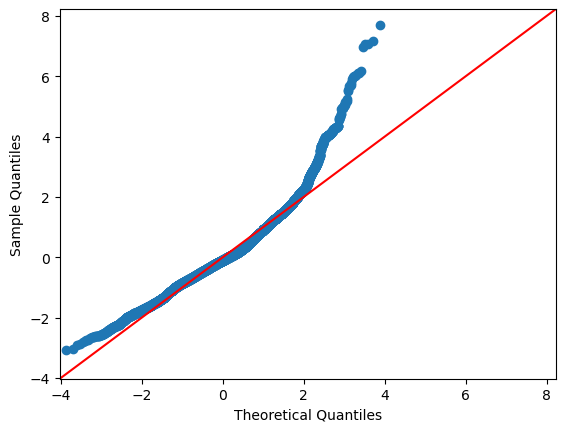

In [45]:
sm.qqplot(Residual,line="45",fit=True)

# Homoscaditity

<AxesSubplot:xlabel='price', ylabel='price'>

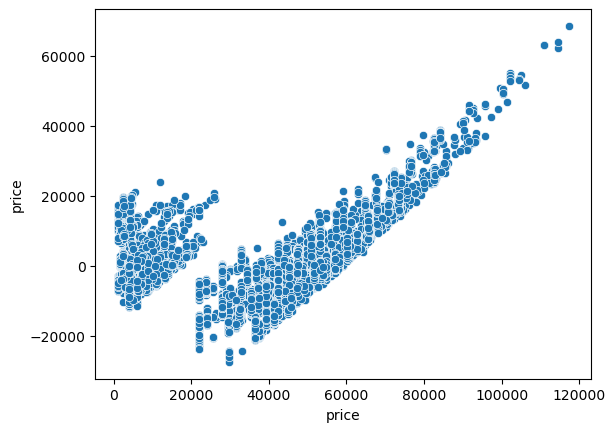

In [46]:
sns.scatterplot(x = y_train, y = Residual)

# Hyper parameter tunning

## 1. Ridge Regression Model

### 1. Grid-SearchCV

In [47]:
def get_best_estimator(x_train, y_train):
    
    Ridge_model = Ridge()
    
    # param_grid
    param_grid = {"alpha":np.arange(0.01,3,0.1)}
    
    gscv_ridge_model = GridSearchCV(Ridge_model,param_grid,n_jobs=-1)
    gscv_ridge_model.fit(x_train,y_train)
    gscv_ridge_model.best_estimator_
    
    model_details.append("Ridge Regression Hyperp Tunning GSCV")
    
    best_params = gscv_ridge_model.best_params_
    best_params_list.append(best_params)
    
    return gscv_ridge_model.best_estimator_


best_params = get_best_estimator(x_train, y_train)


In [48]:
def get_hyp_testing_accuracy(best_params, x_test, y_test):
    
    # To get best model from hyperparameter tunning
    ridge_reg_model = best_params
    
    y_pred = ridge_reg_model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
get_hyp_testing_accuracy(best_params, x_test, y_test)

Mean squared Error:  81738099.07127444
Root Mean squared Error:  9040.912513196577
Mean Absolute Error:  6638.537554664926
r_squared_value for Testing:  0.8292968767538564


In [49]:
def get_hyp_training_accuracy(best_params, x_train, y_train):
    
    # To get best model from hyperparameter tunning
    ridge_reg_model = best_params
    
    y_pred_train = ridge_reg_model.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square) 

    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
get_hyp_training_accuracy(best_params, x_train, y_train)
    

Mean squared Error:  79543270.43484442
Root Mean squared Error:  8918.703405475731
Mean Absolute Error:  6564.4735428413205
r_squared_value for Training:  0.8387762718546488


### 2.Randomize SearchCV 

In [50]:
def get_best_estimator(x_train, y_train):
    
    Ridge_model = Ridge()
    
    # param_grid
    param_grid = {"alpha":np.arange(0.01,3,0.1)}
    
    rscv_ridge_model = RandomizedSearchCV(Ridge_model,param_grid,n_jobs=-1)
    rscv_ridge_model.fit(x_train,y_train)
    rscv_ridge_model.best_estimator_
    
    model_details.append("Ridge Regression Hyperp Tunning RSCV")
    
    best_params = rscv_ridge_model.best_params_
    best_params_list.append(best_params)
    
    return rscv_ridge_model.best_estimator_


best_params = get_best_estimator(x_train, y_train)


In [51]:
def get_hyp_testing_accuracy(best_params, x_test, y_test):
    
    # To get best model from hyperparameter tunning
    ridge_reg_model = best_params
    
    y_pred = ridge_reg_model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
get_hyp_testing_accuracy(best_params, x_test, y_test)

Mean squared Error:  81738564.47029357
Root Mean squared Error:  9040.93825165804
Mean Absolute Error:  6638.606149822646
r_squared_value for Testing:  0.8292959048072731


In [52]:
def get_hyp_training_accuracy(best_params, x_train, y_train):
    
    # To get best model from hyperparameter tunning
    ridge_reg_model = best_params
    
    y_pred_train = ridge_reg_model.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square) 

    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
get_hyp_training_accuracy(best_params, x_train, y_train)
    

Mean squared Error:  79543502.14793451
Root Mean squared Error:  8918.716395756426
Mean Absolute Error:  6564.4384202725405
r_squared_value for Training:  0.8387758022027468


## Lasso Regreration Model

### 1. Grid-SearchCV

In [53]:
def get_best_estimator(x_train, y_train):
    
    Lasso_model = Lasso()
    
    # param_grid
    param_grid = {"alpha":np.arange(0.01,3,0.1)}
    
    grid_searchcv_lasso_model = GridSearchCV(Lasso_model,param_grid,n_jobs=-1)
    grid_searchcv_lasso_model.fit(x_train,y_train)
    grid_searchcv_lasso_model.best_estimator_
    
    model_details.append("Lasso Regression Hyperp Tunning GSCV")
    
    best_params = grid_searchcv_lasso_model.best_params_
    best_params_list.append(best_params)
    
    return grid_searchcv_lasso_model.best_estimator_

best_params = get_best_estimator(x_train, y_train)

In [54]:
def get_hyp_testing_accuracy(best_params, x_test, y_test):
    
    # To get best model from hyperparameter tunning
    Lasso_model = best_params
    
    y_pred = Lasso_model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
get_hyp_testing_accuracy(best_params, x_test, y_test)

Mean squared Error:  81741313.98101127
Root Mean squared Error:  9041.090309305138
Mean Absolute Error:  6638.825388505633
r_squared_value for Testing:  0.8292901626861295


In [55]:
def get_hyp_training_accuracy(best_params, x_train, y_train):
    
    # To get best model from hyperparameter tunning
    Lasso_model = best_params
    
    y_pred_train = Lasso_model.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square) 

    # We are appending testing accuracy in list
    Training_accuracy.append(r_square)
    
get_hyp_training_accuracy(best_params, x_train, y_train)

Mean squared Error:  79544992.91749465
Root Mean squared Error:  8918.799970707643
Mean Absolute Error:  6564.3328294255125
r_squared_value for Training:  0.8387727806092797


### 2.Randomize SearchCV 

In [56]:
def get_best_estimator(x_train, y_train):
    
    Lasso_model = Lasso()
    
    # param_grid
    param_grid = {"alpha":np.arange(0.01,3,0.1)}
    
    random_searchcv_lasso_model = RandomizedSearchCV(Lasso_model,param_grid,n_jobs=-1)
    random_searchcv_lasso_model.fit(x_train,y_train)
    random_searchcv_lasso_model.best_estimator_
    
    model_details.append("Lasso Regression Hyperp Tunning RSCV")
    
    best_params = random_searchcv_lasso_model.best_params_
    best_params_list.append(best_params)
    
    return random_searchcv_lasso_model.best_estimator_

best_params = get_best_estimator(x_train, y_train)

In [57]:
def get_hyp_testing_accuracy(best_params, x_test, y_test):
    
    # To get best model from hyperparameter tunning
    Lasso_model = best_params
    
    y_pred = Lasso_model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
get_hyp_testing_accuracy(best_params, x_test, y_test)

Mean squared Error:  81741410.30281734
Root Mean squared Error:  9041.095636194617
Mean Absolute Error:  6638.819926198759
r_squared_value for Testing:  0.8292899615261647


In [58]:
def get_hyp_training_accuracy(best_params, x_train, y_train):
    
    # To get best model from hyperparameter tunning
    Lasso_model = best_params
    
    y_pred_train = Lasso_model.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square) 

    # We are appending testing accuracy in list
    Training_accuracy.append(r_square)
    
get_hyp_training_accuracy(best_params, x_train, y_train)

Mean squared Error:  79544992.18505065
Root Mean squared Error:  8918.79992964584
Mean Absolute Error:  6564.321381372875
r_squared_value for Training:  0.8387727820938473


# KNN REgressor

In [59]:
def train_test_split_fun(x,y,model_name):
    
    test_size = 0.2
    random_state=101
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=7)
    
    model_details.append(model_name)
    
    return x_train,x_test,y_train,y_test


model_name = "KNN Regressor Regular Model"
x_train, x_test, y_train, y_test = train_test_split_fun(x, y, model_name)

In [60]:
def model_training(x_train, y_train):
    knn_regg = KNeighborsRegressor()
    knn_regg.fit(x_train, y_train)
    return knn_regg

knn_regg = model_training(x_train,y_train)

In [61]:
def model_evalution_training(knn_regg, x_train, y_train):
    
    y_pred_train = knn_regg.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square)   
    
    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
    
model_evalution_training(knn_regg, x_train, y_train)

Mean squared Error:  45344789.199095465
Root Mean squared Error:  6733.853963303293
Mean Absolute Error:  4265.139456
r_squared_value for Training:  0.908092087153601


In [62]:
def model_evalution_testing(knn_regg, x_test, y_test):
    
    y_pred = knn_regg.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
    
model_evalution_testing(knn_regg, x_test, y_test)

Mean squared Error:  72761516.55173759
Root Mean squared Error:  8530.036140119078
Mean Absolute Error:  5632.300192000001
r_squared_value for Testing:  0.8480437119454298


# Decision Tree

In [63]:
def train_test_split_fun(x,y,model_name):
    
    test_size = 0.2
    random_state=101
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=7)
    
    model_details.append(model_name)
    
    return x_train,x_test,y_train,y_test


model_name = "Decision Tree Regular Model"
x_train, x_test, y_train, y_test = train_test_split_fun(x, y, model_name)

In [64]:
def model_training(x_train, y_train):
    dt_regg = DecisionTreeRegressor()
    dt_regg.fit(x_train, y_train)
    return dt_regg

dt_regg = model_training(x_train,y_train)

In [65]:
def model_evalution_training(dt_regg, x_train, y_train):
    
    y_pred_train = dt_regg.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square)   
    
    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
    
model_evalution_training(dt_regg, x_train, y_train)

Mean squared Error:  793707.99032
Root Mean squared Error:  890.902907347372
Mean Absolute Error:  125.35568
r_squared_value for Training:  0.998391258486625


In [66]:
def model_evalution_testing(dt_regg, x_test, y_test):
    
    y_pred = dt_regg.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
    
model_evalution_testing(dt_regg, x_test, y_test)

Mean squared Error:  17103905.37904
Root Mean squared Error:  4135.686808625624
Mean Absolute Error:  1534.65648
r_squared_value for Testing:  0.9642799367604241


# Hyperparameter Tunning (Pre-prunning)

In [67]:
def get_best_estimator(x_train, y_train):
    
    dt_model = DecisionTreeRegressor(random_state=10)
    
    hyperparameter = {"criterion":['squared_error', 'absolute_error'], 
                      "max_depth": np.arange(3,8),
                      "min_samples_split": np.arange(2,20),
                      "min_samples_leaf": np.arange(2,15)} 
    
    rscv_dt_regg = RandomizedSearchCV(dt_model, hyperparameter, cv=5)
    rscv_dt_regg.fit(x_train, y_train)
    rscv_dt_regg.best_estimator_

    model_details.append("Decision Tree Hyperp Tunning(pre-prunning)")
    
    best_params = rscv_dt_regg.best_params_
    best_params_list.append(best_params)
    
    return rscv_dt_regg.best_estimator_

best_params = get_best_estimator(x_train, y_train)

In [68]:
def get_hyp_testing_accuracy(best_params, x_test, y_test):
    
    # To get best model from hyperparameter tunning
    dt_model = best_params
    
    y_pred = dt_model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
get_hyp_testing_accuracy(best_params, x_test, y_test)

Mean squared Error:  35584975.72208973
Root Mean squared Error:  5965.314385855093
Mean Absolute Error:  3943.3304665786336
r_squared_value for Testing:  0.9256837806920116


In [69]:
dt_model = best_params

In [70]:
def get_hyp_training_accuracy(x_train, y_train):
   
    y_pred_train = dt_model.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square) 

    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
get_hyp_training_accuracy(x_train, y_train)
    

Mean squared Error:  34227249.555408575
Root Mean squared Error:  5850.40593082297
Mean Absolute Error:  3806.064686873931
r_squared_value for Training:  0.9306258751077578


# Post Prunning

In [71]:
result = dt_model.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha_list = result['ccp_alphas']
# ccp_alpha_list

In [72]:
train_accuracy_list = []
test_accuracy_list = []

for i in ccp_alpha_list:
    decision_tree_model = DecisionTreeRegressor(ccp_alpha=i, random_state=11)
    decision_tree_model.fit(x_train, y_train)
    
    training_accuracy = decision_tree_model.score(x_train, y_train)
    train_accuracy_list.append(training_accuracy)
    
    testing_accuracy = decision_tree_model.score(x_test, y_test)
    test_accuracy_list.append(testing_accuracy)

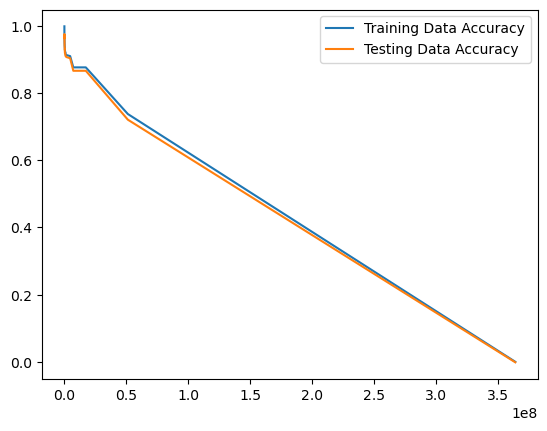

In [73]:
fig, ax = plt.subplots()
ax.plot(ccp_alpha_list, train_accuracy_list, label = "Training Data Accuracy")
ax.plot(ccp_alpha_list, test_accuracy_list, label = "Testing Data Accuracy")
ax.legend()

In [74]:
max_test = test_accuracy_list.index(max(test_accuracy_list))
max_test

14

In [75]:
best_ccp = ccp_alpha_list[max_test]
best_ccp

10058.046600978829

In [76]:
decision_tree_model = DecisionTreeRegressor(ccp_alpha= best_ccp,random_state=11)

decision_tree_model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=10058.046600978829, random_state=11)

In [77]:
def get_hyp_testing_accuracy(x_test, y_test):
    
    model_details.append("Decision Tree Hyperp Tunning(post-prunning)")
    
    y_pred = decision_tree_model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
get_hyp_testing_accuracy(x_test, y_test)

Mean squared Error:  12233628.322858354
Root Mean squared Error:  3497.660407023294
Mean Absolute Error:  1736.1945662043602
r_squared_value for Testing:  0.9744510994619117


In [78]:
def get_hyp_training_accuracy(x_train, y_train):
   
    y_pred_train = decision_tree_model.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square) 

    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
get_hyp_training_accuracy(x_train, y_train)
    

Mean squared Error:  7106460.299229508
Root Mean squared Error:  2665.794496811318
Mean Absolute Error:  1468.7565505888756
r_squared_value for Training:  0.9855961413568329


# Random Forest

In [129]:
def train_test_split_fun(x,y,model_name):
    
    test_size = 0.2
    random_state=101
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=7)
    
    model_details.append(model_name)
    
    return x_train,x_test,y_train,y_test


model_name = "Random Forest Tree Regular Model"
x_train, x_test, y_train, y_test = train_test_split_fun(x, y, model_name)

In [130]:
rf_regg = RandomForestRegressor()

In [131]:
def model_training(x_train, y_train):
    
    rf_regg.fit(x_train, y_train)
    return rf_regg

rf_regg = model_training(x_train,y_train)

In [132]:
def model_evalution_training(rf_regg, x_train, y_train):
    
    y_pred_train = rf_regg.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square)   
    
    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
    
model_evalution_training(rf_regg, x_train, y_train)

Mean squared Error:  2237201.104231801
Root Mean squared Error:  1495.7276169917438
Mean Absolute Error:  601.2306805047618
r_squared_value for Training:  0.9954654881467239


In [133]:
def model_evalution_testing(rf_regg, x_test, y_test):
    
    y_pred = rf_regg.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
    
model_evalution_testing(rf_regg, x_test, y_test)

Mean squared Error:  11668234.213612627
Root Mean squared Error:  3415.879712989412
Mean Absolute Error:  1447.6326861542857
r_squared_value for Testing:  0.9756318773538597


# Hyperparameter Tunning (Pre-prunning)

In [83]:
def get_best_estimator(x_train, y_train):
    
    rf_model = RandomForestRegressor(random_state=10, n_jobs=-1)
    
    hyperparameter = {"n_estimators" : np.arange(10,200),
                      "criterion":['squared_error', 'absolute_error'], 
                     "max_depth": np.arange(3,8),
                     "min_samples_split": np.arange(2,20),
                     "min_samples_leaf": np.arange(2,15), 
                     "max_features": ['sqrt', 'log2']
                     } 
    
    rscv_rf_reg = RandomizedSearchCV(rf_model, hyperparameter, cv=5)
    rscv_rf_reg.fit(x_train, y_train)
    rscv_rf_reg.best_estimator_

    model_details.append("Decision Tree Hyperp Tunning")
    
    best_params = rscv_rf_reg.best_params_
    best_params_list.append(best_params)
    
    return rscv_rf_reg.best_estimator_

best_params = get_best_estimator(x_train, y_train)

In [84]:
def get_hyp_testing_accuracy(best_params, x_test, y_test):
    
    # To get best model from hyperparameter tunning
    rf_model = best_params
    
    y_pred = rf_model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
get_hyp_testing_accuracy(best_params, x_test, y_test)

Mean squared Error:  35309051.20117351
Root Mean squared Error:  5942.141970802575
Mean Absolute Error:  3981.7385848275862
r_squared_value for Testing:  0.9262600257727729


In [85]:
rf_model = best_params

In [86]:
def get_hyp_training_accuracy(x_train, y_train):
   
    y_pred_train = rf_model.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square) 

    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
get_hyp_training_accuracy(x_train, y_train)
    

Mean squared Error:  33467324.007791374
Root Mean squared Error:  5785.094986929028
Mean Absolute Error:  3798.7423347126437
r_squared_value for Training:  0.9321661440611209


# AdaBoost

In [87]:
def train_test_split_fun(x,y,model_name):
    
    test_size = 0.2
    random_state=101
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=7)
    
    model_details.append(model_name)
    
    return x_train,x_test,y_train,y_test


model_name = "AdaBoost Regular Model"
x_train, x_test, y_train, y_test = train_test_split_fun(x, y, model_name)

In [88]:
def model_training(x_train, y_train):
    adb_regg = AdaBoostRegressor()
    adb_regg.fit(x_train, y_train)
    return adb_regg

adb_regg = model_training(x_train,y_train)

In [89]:
def model_evalution_training(adb_regg, x_train, y_train):
    
    y_pred_train = adb_regg.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square)   
    
    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
    
model_evalution_training(adb_regg, x_train, y_train)

Mean squared Error:  59078081.92048818
Root Mean squared Error:  7686.226767438506
Mean Absolute Error:  6076.460684064852
r_squared_value for Training:  0.8802565123758705


In [90]:
def model_evalution_testing(adb_regg, x_test, y_test):
    
    y_pred = adb_regg.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
    
model_evalution_testing(adb_regg, x_test, y_test)

Mean squared Error:  60077144.11330979
Root Mean squared Error:  7750.944723923
Mean Absolute Error:  6141.264263079996
r_squared_value for Testing:  0.8745339535372834


# Hyper parameter for adaboost

In [91]:
def get_best_estimator(x_train, y_train):
    
    adb_reg = AdaBoostRegressor(random_state=30)
    
    param_grid = {"n_estimators" : np.arange(10,200,2),
                "learning_rate" : np.arange(0,2,0.001)
                }
    
    rscv_adb_reg = RandomizedSearchCV(adb_reg, param_grid, cv=7)
    rscv_adb_reg.fit(x_train, y_train)
    rscv_adb_reg.best_estimator_

    model_details.append("AdaBoost Hyperp Tunning")
    
    best_params = rscv_adb_reg.best_params_
    best_params_list.append(best_params)
    
    return rscv_adb_reg.best_estimator_

best_params = get_best_estimator(x_train, y_train)

In [92]:
def get_hyp_testing_accuracy(best_params, x_test, y_test):
    
    # To get best model from hyperparameter tunning
    rf_model = best_params
    
    y_pred = rf_model.predict(x_test)
    
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_test,y_pred)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_test,y_pred)
    print("r_squared_value for Testing: ",r_square)
    
    # We are appending testing accuracy in list
    Testing_accuracy.append(r_square)
    
get_hyp_testing_accuracy(best_params, x_test, y_test)

Mean squared Error:  51888300.540087834
Root Mean squared Error:  7203.3534232389175
Mean Absolute Error:  5338.6982627818825
r_squared_value for Testing:  0.8916356624050684


In [93]:
rf_model = best_params

In [94]:
def get_hyp_training_accuracy(x_train, y_train):
   
    y_pred_train = rf_model.predict(x_train)

    mse = mean_squared_error(y_train,y_pred_train)
    print("Mean squared Error: ",mse)

    rmse = np.sqrt(mse)
    print("Root Mean squared Error: ",rmse)

    mae = mean_absolute_error(y_train,y_pred_train)
    print("Mean Absolute Error: ",mae)

    r_square = r2_score(y_train,y_pred_train)
    print("r_squared_value for Training: ",r_square) 

    # We are appending training accuracy in list
    Training_accuracy.append(r_square)
    
get_hyp_training_accuracy(x_train, y_train)
    

Mean squared Error:  50586919.07966619
Root Mean squared Error:  7112.44817764363
Mean Absolute Error:  5231.0173646122275
r_squared_value for Training:  0.8974669806153924


# Overall Model Accuracy

In [95]:
comparison_df = pd.DataFrame({"Model Details":model_details, "Training Accuracy":Training_accuracy,
                              "Testing Accuracy":Testing_accuracy})
comparison_df

,Model Details,Training Accuracy,Testing Accuracy
0,Linear Regression Regular Model,0.836389,0.837023
1,Ridge Regression Hyperp Tunning GSCV,0.838776,0.829297
2,Ridge Regression Hyperp Tunning RSCV,0.838776,0.829296
3,Lasso Regression Hyperp Tunning GSCV,0.838773,0.829290
4,Lasso Regression Hyperp Tunning RSCV,0.838773,0.829290
5,KNN Regressor Regular Model,0.908092,0.848044
6,Decision Tree Regular Model,0.998391,0.964280
7,Decision Tree Hyperp Tunning(pre-prunning),0.930626,0.925684
8,Decision Tree Hyperp Tunning(post-prunning),0.985596,0.974451
9,Random Forest Tree Regular Model,0.995519,0.975638


In [96]:
comparison_df["Difference_in_%"] = (comparison_df['Training Accuracy'] - comparison_df['Testing Accuracy']) *100
comparison_df

,Model Details,Training Accuracy,Testing Accuracy,Difference_in_%
0,Linear Regression Regular Model,0.836389,0.837023,-0.063388
1,Ridge Regression Hyperp Tunning GSCV,0.838776,0.829297,0.947940
2,Ridge Regression Hyperp Tunning RSCV,0.838776,0.829296,0.947990
3,Lasso Regression Hyperp Tunning GSCV,0.838773,0.829290,0.948262
4,Lasso Regression Hyperp Tunning RSCV,0.838773,0.829290,0.948282
5,KNN Regressor Regular Model,0.908092,0.848044,6.004838
6,Decision Tree Regular Model,0.998391,0.964280,3.411132
7,Decision Tree Hyperp Tunning(pre-prunning),0.930626,0.925684,0.494209
8,Decision Tree Hyperp Tunning(post-prunning),0.985596,0.974451,1.114504
9,Random Forest Tree Regular Model,0.995519,0.975638,1.988037


# Overall Performance of model selection

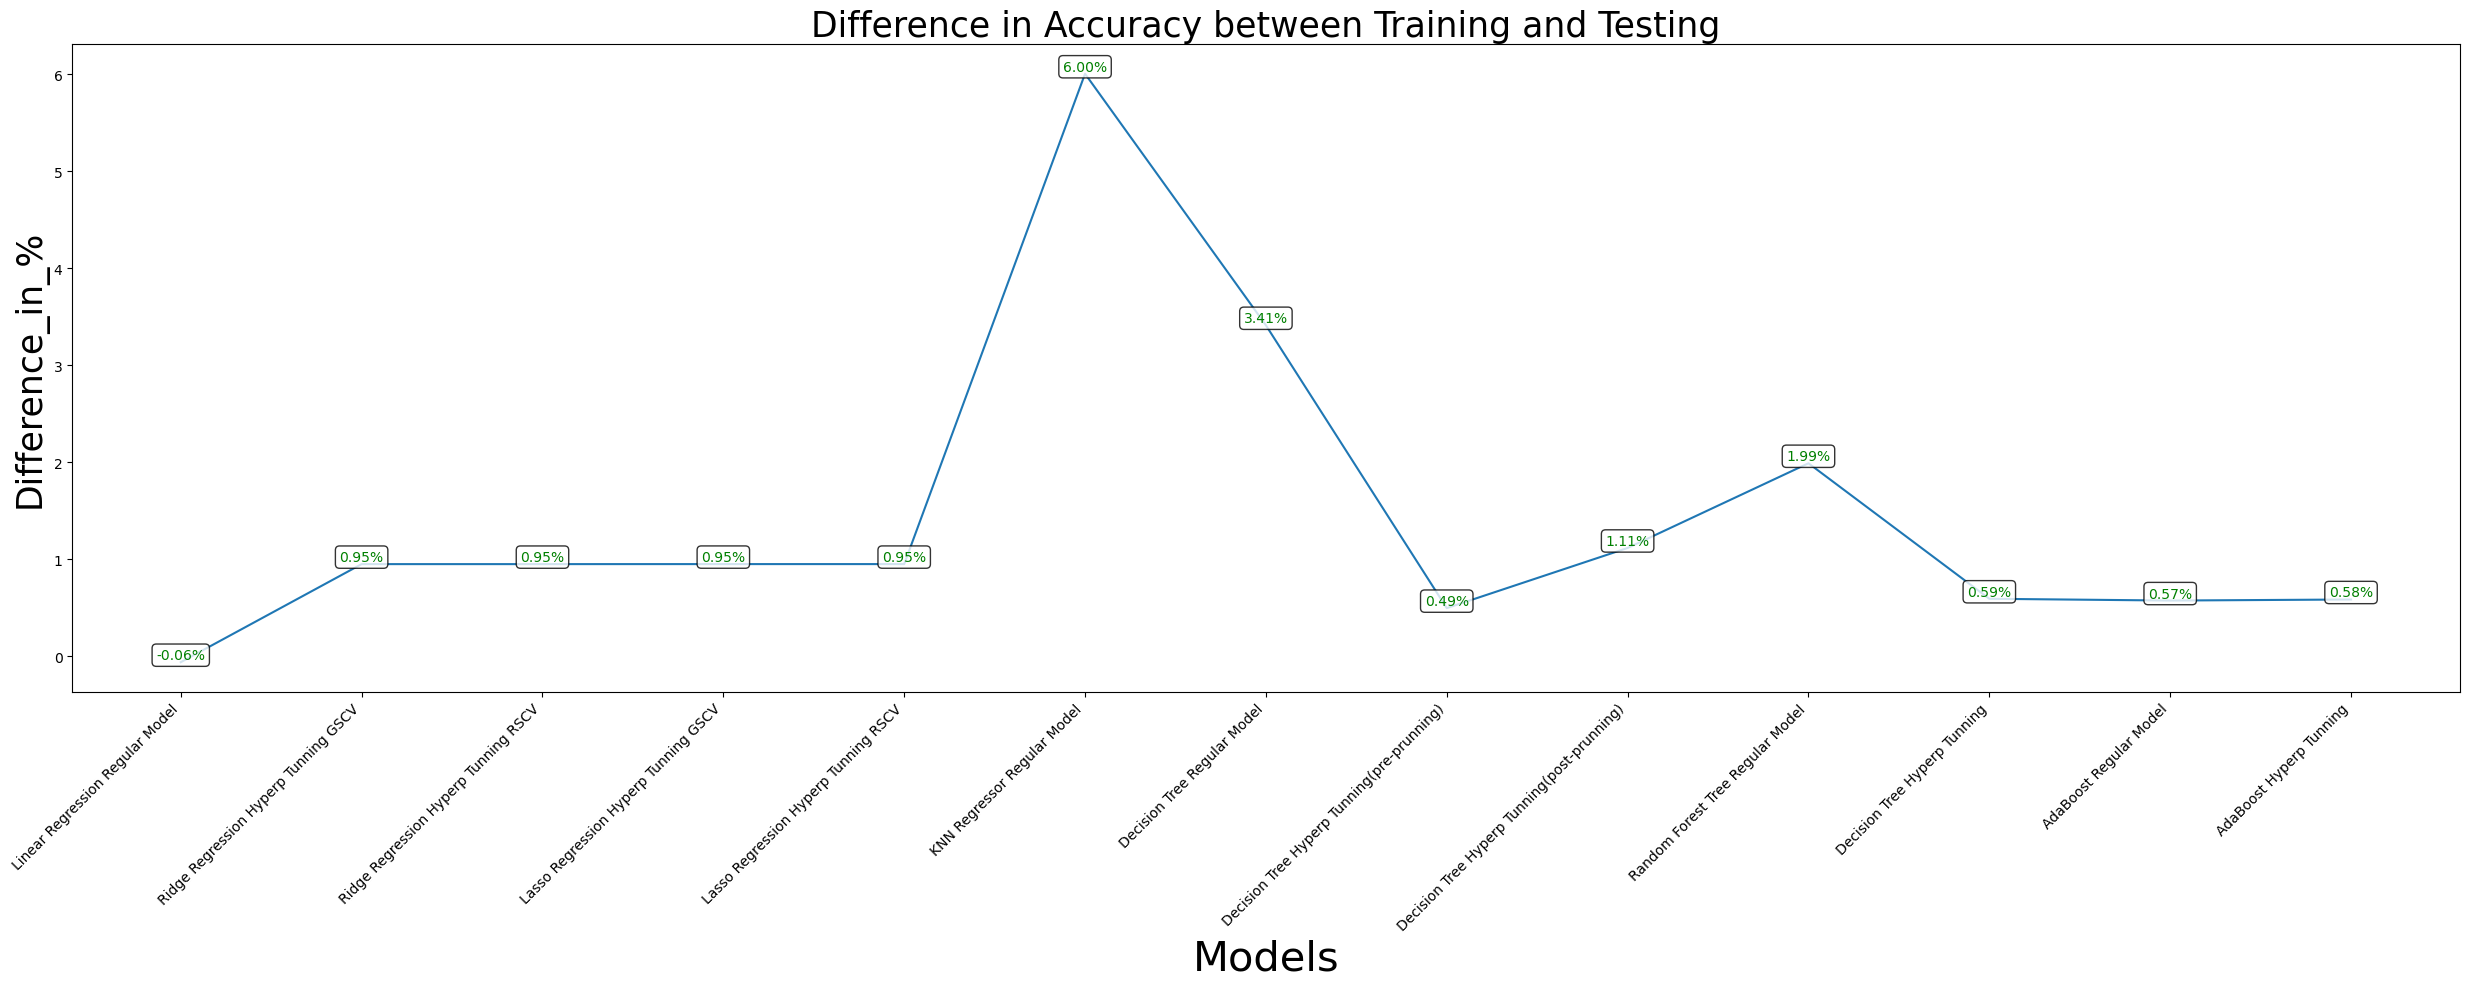

In [97]:
# import matplotlib.pyplot as plt

# comparison_df["Difference_in_%"] = (comparison_df['Training Accuracy'] - comparison_df['Testing Accuracy']) * 100

# x = comparison_df["Model Details"]
# y = comparison_df["Difference_in_%"]

# props = dict(boxstyle='round', facecolor='white', alpha=0.8)
# plt.figure(figsize=(25, 10))
# plt.plot(x, y)
# plt.xticks(rotation=45, ha='right')
# plt.xlabel("Models", fontsize=30)
# plt.ylabel("Difference_in_%", fontsize=25)
# plt.title("Difference in Accuracy between Training and Testing", fontsize=25)

# plt.xticks(range(len(x)), x)  # Set the x-axis tick labels explicitly

# for i, j in zip(x, y):
#     plt.text(i, j, f"{j:.2f}%", ha="center", va="bottom", color="green", bbox=props)

# # plt.savefig('Overall-Performance.jpg',dpi=600)
# plt.tight_layout()
# plt.show()


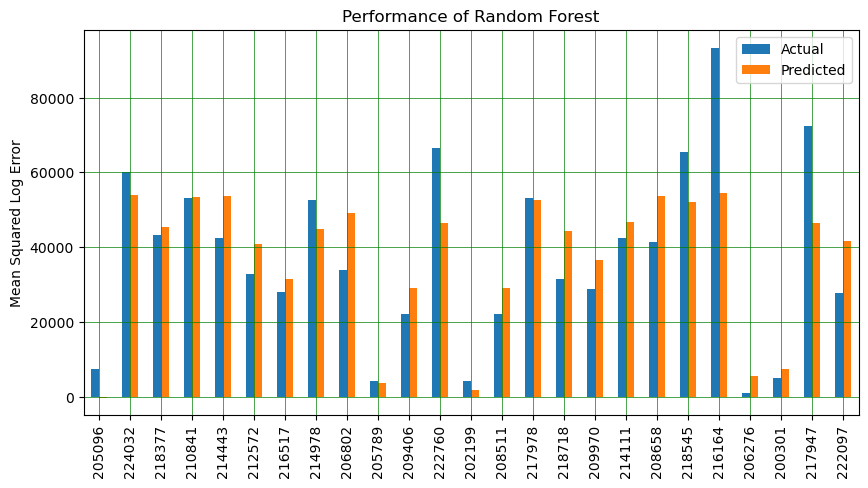

In [98]:
# # Final Model Analysis
# df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# df_check = df_check.sample(25)
# #round(df_check,2)
# df_check.plot(kind='bar',figsize=(10,5))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.title('Performance of Random Forest')
# plt.ylabel('Mean Squared Log Error')
# # plt.savefig('Random-Forest-Performance.jpg')
# plt.show()

# Making pickle File

In [135]:
# with open("Random_Forest_model.pkl","wb") as f:
#     pickle.dump(rf_regg,f)

# Making Json File

In [105]:
column_name = x.columns

json_dict = {"airline":airlines_cat,
             "source_city":source_city_cat,
             "departure_time":departure_time_cat,
             "arrival_time":arrival_time_cat,
             "destination_city":destination_city_cat,
             "class":class_cat,
             "stops":stops_cat,
             "columns":list(column_name)}
 
json_dict

{'airline': {'AirAsia': 0,
  'Air_India': 1,
  'GO_FIRST': 2,
  'Indigo': 3,
  'SpiceJet': 4,
  'Vistara': 5},
 'source_city': {'Chennai': 0, 'Delhi': 1, 'Mumbai': 2},
 'departure_time': {'Afternoon': 0,
  'Early_Morning': 1,
  'Evening': 2,
  'Late_Night': 3,
  'Morning': 4,
  'Night': 5},
 'arrival_time': {'Afternoon': 0,
  'Early_Morning': 1,
  'Evening': 2,
  'Late_Night': 3,
  'Morning': 4,
  'Night': 5},
 'destination_city': {'Bangalore': 0,
  'Chennai': 1,
  'Delhi': 2,
  'Hyderabad': 3,
  'Kolkata': 4,
  'Mumbai': 5},
 'class': {'Business': 0, 'Economy': 1},
 'stops': {'one': 0, 'two_or_more': 1, 'zero': 2},
 'columns': ['airline',
  'source_city',
  'departure_time',
  'stops',
  'arrival_time',
  'destination_city',
  'class',
  'duration',
  'days_left']}

In [123]:
# with open("Flight_data.json","w") as f:
#     json.dump(json_dict,f)

In [106]:
df.head(1).T

,200000
airline,3.00
source_city,0.00
departure_time,4.00
stops,0.00
arrival_time,2.00
destination_city,4.00
class,1.00
duration,11.08
days_left,23.00
price,7653.00


In [112]:
airline          = "AirAsia"
source_city      = "Chennai"
departure_time   = "Evening"
stops            = "two_or_more"
arrival_time     = 2.00
destination_city = "Bangalore"
class_           = "Business"
duration         = 11.08
days_left        = 23.00

In [124]:
with open("Flight_data.json","r") as f:
    json_dict = json.load(f)

In [121]:
test_array = np.zeros(len(column_name))
test_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [125]:
test_array[0] = json_dict["airline"][airline]
test_array[1] = json_dict["source_city"][source_city]
test_array[2] = json_dict["departure_time"][departure_time]
test_array[3] = json_dict["stops"][stops]
test_array[4] = arrival_time
test_array[5] = json_dict["destination_city"][destination_city]
test_array[6] = json_dict["class_"][class_]
test_array[7] = duration
test_array[8] = days_left

test_array

array([ 0.  ,  0.  ,  2.  ,  1.  ,  2.  ,  0.  ,  0.  , 11.08, 23.  ])

In [134]:
price = round(rf_regg.predict([test_array])[0])
print(f"The Total Price of your Flight Ticket is: {price} INR only/-")

The Total Price of your Flight Ticket is: 35472 INR only/-


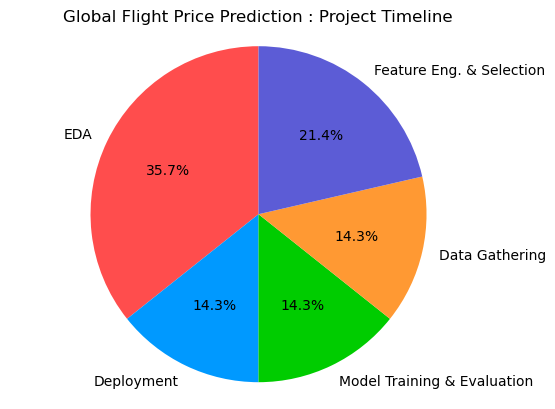

In [3]:
import matplotlib.pyplot as plt

# Data
labels = ['EDA', 'Deployment', 'Model Training & Evaluation', 'Data Gathering', 'Feature Eng. & Selection']
sizes = [35.7, 14.3, 14.3, 14.3, 21.4]
colors = ['#FF4D4D', '#0099FF', '#00CC00', '#FF9933', '#5C5CD6']

# Create pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Global Flight Price Prediction : Project Timeline')

# Save the chart as a JPG image
plt.savefig('project_timeline.jpg',dpi=600)